In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 17.9 MB/s eta 0:00:00


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
# import zipfile

# # Path to the zip file
# zip_path = "/content/Archive.zip"  # Adjust if necessary

# # Extract the zip file to the root directory
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall("/content/")  # Extracts to the root of Colab

# print("Files extracted to the root directory.")

Files extracted to the root directory.


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Step 2: Define the folder path
folder_path = "/content/drive/My Drive/YOLOv11-litter-detec-folder"

# Step 3: Check contents of the folder
import os
if os.path.exists(folder_path):
    print(f"Contents of {folder_path}:")
    print(os.listdir(folder_path))
else:
    print(f"Folder {folder_path} does not exist. Check the path.")

Mounted at /content/drive/
Contents of /content/drive/My Drive/YOLOv11-litter-detec-folder:
['yolo11m.pt', 'dataset_custom.yaml', 'yolo11m-custom-litter-best.pt', 'yolo11x.pt', 'yolo11x-custom-litter-best.pt', 'yolo11n.pt', 'yolo11n-custom-litter-best.pt', 'vecteezy_a-city-s-garbage_1803529.gif', 'val', 'train']


In [ ]:
from ultralytics import YOLO

# Define dataset configuration as a dictionary
dataset_config = {
    # "train": "/Users/damien/Desktop/UDM/Msc/2annee_4semestre/codes/yolov11-litter-custom/train",
    # "val": "/Users/damien/Desktop/UDM/Msc/2annee_4semestre/codes/yolov11-litter-custom/val",
    "train": "/content/drive/MyDrive/YOLOv11-litter-detec-folder/train",
    "val": "/content/drive/MyDrive/YOLOv11-litter-detec-folder/val",
    "nc": 29,
    "names": [
        "Aerosol can",
        "Aluminium foil",
        "Battery",
        "Blister pack",
        "Bottle",
        "Bottle cap",
        "Broken glass",
        "Can",
        "Carton",
        "Cigarette",
        "Cup",
        "Food waste",
        "Glass jar",
        "Lid",
        "Other plastic",
        "Paper",
        "Paper bag",
        "Plastic bag & wrapper",
        "Plastic container",
        "Plastic gloves",
        "Plastic utensils",
        "Pop tab",
        "Rope & strings",
        "Scrap metal",
        "Shoe",
        "Squeezable tube",
        "Straw",
        "Styrofoam piece",
        "Unlabeled litter"
    ]
}

# Write the dataset config to a temporary YAML file
import yaml
with open("dataset_temp.yaml", "w") as f:
    yaml.dump(dataset_config, f)

# Load and train the model
# model = YOLO("/content/drive/MyDrive/YOLOv11-litter-detec-folder/yolo11m.pt")
model = YOLO("/content/drive/MyDrive/YOLOv11-litter-detec-folder/yolo11x.pt")
# model = YOLO("/content/drive/MyDrive/YOLOv11-litter-detec-folder/yolo11n.pt")


model.train(
    data="dataset_temp.yaml",
    imgsz=640,
    # batch=8,
    batch=16,
    epochs=100,
    # workers=1,
    workers=8,
    device=0,  # 0 for GPU or "cpu"
    val=True  # Ensures evaluation on the validation set after each epoch
)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLOv11-litter-detec-folder/yolo11x.pt, data=dataset_temp.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

100%|██████████| 755k/755k [00:00<00:00, 13.6MB/s]


Overriding model.yaml nc=80 with nc=29

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 64.6MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/YOLOv11-litter-detec-folder/train/labels.cache... 562 images, 3 backgrounds, 3 corrupt: 100%|██████████| 562/562 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/YOLOv11-litter-detec-folder/train/images/431b910d-batch_1_000067.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.9316]
train: WARNING ⚠️ /content/drive/MyDrive/YOLOv11-litter-detec-folder/train/images/ac43dacd-batch_1_000128.JPG: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1812]
train: WARNING ⚠️ /content/drive/MyDrive/YOLOv11-litter-detec-folder/train/images/be5ab798-batch_1_000054.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.7927]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/YOLOv11-litter-detec-folder/val/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000303, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      16.7G      1.529      4.338      1.523         55        640: 100%|██████████| 35/35 [00:16<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


                   all         50         81       0.62      0.161      0.159      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      16.7G      1.498      2.878      1.463         47        640: 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all         50         81      0.348      0.261      0.164      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      16.5G      1.491      2.696      1.478         61        640: 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


                   all         50         81      0.593     0.0528     0.0871     0.0572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      16.8G      1.472      2.579       1.46         41        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         50         81      0.334      0.335      0.141      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      16.5G      1.492      2.486       1.51         32        640: 100%|██████████| 35/35 [00:08<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         50         81      0.246      0.372      0.183     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      16.7G      1.482      2.315      1.486         43        640: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         50         81       0.58       0.16      0.161     0.0899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      16.7G      1.502      2.217      1.534         73        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         50         81      0.454      0.186      0.143     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      16.7G      1.466      2.061      1.494         49        640: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         50         81      0.451      0.309      0.303      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      16.5G      1.446      2.011      1.471         33        640: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         50         81       0.31      0.334      0.292      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      16.7G      1.439      2.002      1.495         48        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         50         81      0.643      0.318      0.333      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      16.7G      1.448      1.964      1.461         51        640: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         50         81      0.388      0.359      0.335      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      16.8G      1.412      1.856      1.455         45        640: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         50         81      0.528      0.349       0.29      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      16.5G      1.342      1.789      1.418         45        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         50         81       0.51      0.301      0.244      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      16.7G      1.388      1.738      1.438         40        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         50         81      0.612      0.303      0.302       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      16.7G      1.331       1.66      1.411         50        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         50         81      0.554      0.336      0.247      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      16.8G      1.293      1.579      1.385         46        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         50         81      0.246       0.35      0.268      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      16.5G      1.317      1.588      1.374         67        640: 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         50         81      0.449      0.321      0.309      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      16.7G      1.283      1.527      1.372         52        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         50         81       0.57       0.25      0.317      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      16.7G      1.266      1.395      1.366         53        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         50         81      0.642      0.256      0.293      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      16.7G      1.232      1.367      1.333         32        640: 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         50         81      0.409      0.295      0.336      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      16.5G      1.222       1.29      1.318         54        640: 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         50         81      0.554      0.298      0.351      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      16.7G      1.218      1.238      1.306         59        640: 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all         50         81      0.661      0.332      0.352      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      16.7G      1.218      1.266      1.322         53        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         50         81      0.637      0.327      0.319      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      16.7G      1.189      1.244        1.3         40        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         50         81      0.531      0.275      0.347      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      16.5G      1.214      1.223      1.291         35        640: 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         50         81      0.507      0.249      0.326      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      16.7G      1.194      1.156      1.293         51        640: 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         50         81      0.594      0.312      0.384       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      16.7G      1.162       1.09      1.275         47        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         50         81       0.57      0.249      0.312      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      16.7G      1.125      1.054      1.281         66        640: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.85it/s]

                   all         50         81      0.557      0.321      0.332      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      16.5G      1.097      1.034      1.253         47        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         50         81      0.328      0.414      0.384       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      16.7G      1.078      1.031      1.245         60        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         50         81      0.506      0.422      0.342      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      16.7G      1.055     0.9898      1.233         63        640: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         50         81      0.283      0.449      0.338      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      16.8G      1.053     0.9663      1.222         67        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         50         81      0.262      0.287      0.335      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      16.5G      1.029     0.9339      1.199         54        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         50         81      0.543      0.273       0.33      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      16.7G      1.029     0.9196      1.208         49        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         50         81      0.685      0.315       0.34      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      16.7G      1.017     0.8828      1.205         50        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         50         81      0.363      0.463      0.379       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      16.7G     0.9909     0.8548      1.191         51        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         50         81      0.431      0.462      0.403      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      16.5G     0.9791     0.8389      1.188         45        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         50         81       0.43      0.338      0.321      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      16.7G      0.963     0.8666      1.164         61        640: 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         50         81      0.531       0.35       0.34      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      16.7G      0.984     0.8445      1.201         47        640: 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         50         81      0.615      0.278      0.257      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      16.7G     0.9673      0.791      1.181         46        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         50         81      0.409      0.319      0.331      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      16.5G     0.9567     0.7782      1.177         46        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         50         81      0.714      0.297      0.355       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      16.7G     0.9277     0.7796      1.134         50        640: 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         50         81      0.366      0.462      0.355      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      16.7G     0.9267     0.7523      1.141         48        640: 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         50         81      0.411      0.414      0.367      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      16.8G     0.9006     0.7207      1.132         49        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         50         81      0.737      0.281       0.33      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      16.5G      0.896     0.7204      1.139         35        640: 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         50         81      0.363      0.371      0.345      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      16.7G     0.8864     0.7149      1.126         51        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         50         81      0.524      0.422       0.34      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      16.7G      0.874      0.681      1.122         71        640: 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         50         81      0.513      0.361      0.371      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      16.7G     0.8729     0.6777      1.135         33        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         50         81      0.327      0.408      0.362      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      16.5G     0.8736     0.7087      1.116         53        640: 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         50         81      0.546      0.347      0.412      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      16.7G     0.8497     0.6762      1.107         63        640: 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         50         81      0.405      0.446      0.348      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      16.7G     0.8068     0.6478      1.082         44        640: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         50         81      0.666      0.321      0.413      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      16.7G     0.8371     0.6786      1.103         93        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         50         81      0.662      0.353      0.394      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      16.5G     0.8132     0.6429      1.063         49        640: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         50         81      0.537      0.334      0.351      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      16.7G     0.7999     0.6225       1.07         46        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         50         81      0.618      0.366      0.406       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      16.7G     0.8088     0.6081      1.083         44        640: 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         50         81       0.46      0.417      0.416      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      16.7G     0.7883     0.5963      1.046         55        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         50         81      0.359      0.394      0.392      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      16.5G      0.791     0.6121      1.067         69        640: 100%|██████████| 35/35 [00:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         50         81      0.492      0.407      0.409      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      16.7G     0.7651     0.5624      1.033         61        640: 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         50         81      0.457      0.446      0.424      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      16.7G     0.7597     0.5698      1.036         48        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         50         81      0.712      0.343      0.402      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      16.7G     0.7554     0.5667      1.038         77        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         50         81      0.252      0.383      0.319      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      16.5G     0.7255     0.5606      1.031         53        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         50         81      0.494      0.354      0.373       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      16.7G     0.7022     0.5339      1.022         29        640: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         50         81      0.454      0.445      0.432      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      16.7G     0.7262      0.524      1.018         62        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         50         81      0.376       0.48      0.394      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      16.7G     0.7381     0.5594      1.046         57        640: 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         50         81       0.46      0.441      0.381      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      16.5G     0.7144     0.5203      1.012         84        640: 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         50         81      0.352      0.359      0.365       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      16.7G     0.6931     0.5191      1.026         70        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         50         81      0.492      0.351      0.353      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      16.7G     0.7006     0.5065      1.019         73        640: 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         50         81      0.562       0.33      0.359      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      16.7G     0.6796     0.5031      1.022         39        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         50         81      0.391      0.431      0.344      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      16.5G     0.6785     0.4891      1.006         45        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         50         81      0.298      0.396      0.336      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      16.7G     0.6674     0.4861     0.9931         63        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         50         81      0.397      0.323      0.349      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      16.7G     0.6474     0.4854      1.003         66        640: 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         50         81      0.572      0.307      0.354      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      16.8G     0.6539     0.4871     0.9947         95        640: 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         50         81      0.237      0.411      0.358      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      16.5G     0.6421     0.4573     0.9848         34        640: 100%|██████████| 35/35 [00:08<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         50         81      0.391      0.416      0.406      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      16.7G     0.6409     0.4701     0.9861         38        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         50         81      0.609      0.363      0.397      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      16.7G     0.6398      0.478     0.9951         44        640: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         50         81      0.306      0.404      0.351      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      16.7G     0.6287     0.4713     0.9822         38        640: 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         50         81      0.482      0.375      0.354       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      16.5G     0.6318     0.4737     0.9734         46        640: 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         50         81      0.344      0.475      0.389       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      16.7G      0.616      0.459     0.9726         47        640: 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         50         81      0.581      0.353      0.403      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      16.7G     0.6059     0.4404     0.9728         68        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         50         81      0.545       0.43       0.41       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      16.7G     0.5929     0.4439     0.9694         59        640: 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         50         81       0.49      0.359      0.367       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      16.5G      0.582     0.4261     0.9529         63        640: 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         50         81      0.442      0.385      0.366      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      16.7G     0.5725     0.4258     0.9498         48        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         50         81      0.392      0.362       0.38      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      16.7G     0.5948     0.4394     0.9642         54        640: 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         50         81      0.479      0.347      0.376      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      16.8G     0.5829     0.4425     0.9738         55        640: 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         50         81      0.521      0.356      0.387      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      16.5G     0.5618     0.4177     0.9518         44        640: 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all         50         81       0.48      0.392      0.358      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      16.7G     0.5604     0.4105     0.9566         74        640: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         50         81      0.465      0.329      0.371       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      16.7G     0.5421     0.3993      0.929         47        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         50         81      0.276      0.341      0.373      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      16.8G     0.5437     0.3977     0.9483         68        640: 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         50         81      0.338       0.35      0.361      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      16.5G     0.5522      0.396     0.9381         69        640: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         50         81      0.329      0.427       0.36      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      16.7G     0.5399     0.4028     0.9384         41        640: 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         50         81      0.323      0.403      0.361      0.216


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      16.7G     0.5006      0.331     0.8979         35        640: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         50         81      0.337      0.447       0.37      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      16.7G     0.4824     0.3154     0.8845         30        640: 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         50         81      0.268      0.339      0.365      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      16.5G     0.4651     0.2915      0.861         31        640: 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all         50         81      0.269      0.332      0.372      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      16.7G     0.4491     0.3039     0.8799         23        640: 100%|██████████| 35/35 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         50         81      0.325      0.394      0.366      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      16.7G     0.4355     0.2937     0.8628         35        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         50         81      0.261      0.383      0.375      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      16.7G      0.431     0.2885     0.8458         39        640: 100%|██████████| 35/35 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         50         81      0.261        0.4      0.376      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      16.5G     0.4264     0.2819     0.8506         24        640: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         50         81      0.332      0.414      0.379      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      16.7G     0.4071     0.2799     0.8525         22        640: 100%|██████████| 35/35 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         50         81      0.275      0.405      0.383      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      16.7G     0.4111     0.2785     0.8605         24        640: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         50         81      0.284      0.422       0.38      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      16.7G     0.4076     0.2734     0.8499         24        640: 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         50         81      0.278      0.426       0.38      0.248



100 epochs completed in 0.322 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 114.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11x summary (fused): 464 layers, 56,860,519 parameters, 0 gradients, 194.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


                   all         50         81      0.545      0.431       0.41      0.273
           Aerosol can          1          1      0.756          1      0.995      0.895
        Aluminium foil          3          4      0.821       0.75      0.766      0.602
                Bottle         14         19       0.63      0.718      0.777      0.474
            Bottle cap          2          2      0.213        0.5      0.535      0.211
                   Can          6          6      0.673      0.689      0.743      0.274
                Carton          4          5      0.331      0.308       0.45      0.337
             Cigarette          2          4      0.159       0.25      0.107     0.0298
                   Cup          3          5      0.472        0.2      0.294       0.21
            Food waste          1          1          1          0     0.0905     0.0362
                   Lid          1          1          1          0          0          0
         Other plasti

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  4,  5,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 23, 27])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cfa641f6d40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    


0: 288x640 2 Bottles, 1 Bottle cap, 1 Carton, 21.5ms
Speed: 1.8ms preprocess, 21.5ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 2 Bottles, 1 Bottle cap, 1 Carton, 2 Plastic bag & wrappers, 19.1ms
Speed: 1.7ms preprocess, 19.1ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 Bottle, 1 Carton, 2 Plastic bag & wrappers, 19.4ms
Speed: 1.8ms preprocess, 19.4ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 Bottle, 1 Carton, 2 Plastic bag & wrappers, 19.1ms
Speed: 1.9ms preprocess, 19.1ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 Bottle, 3 Plastic bag & wrappers, 19.1ms
Speed: 1.9ms preprocess, 19.1ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 Bottle, 1 Carton, 2 Plastic bag & wrappers, 19.6ms
Speed: 1.9ms preprocess, 19.6ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 Bottle, 1 Plastic ba

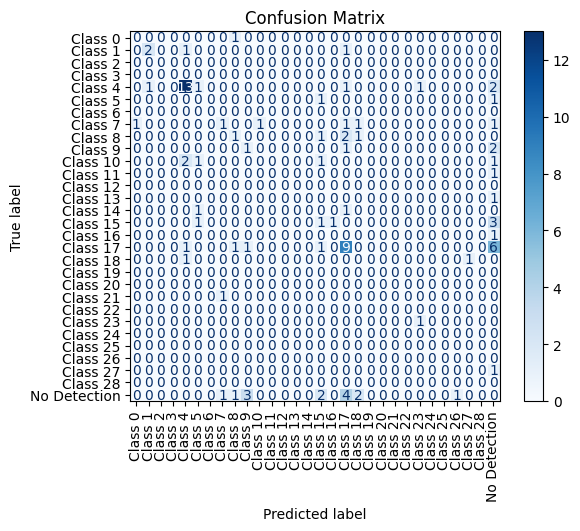

In [ ]:
# from ultralytics import YOLO

# model = YOLO("/content/best.pt")

# model.predict(
#     source="/content/drive/MyDrive/YOLOv11-litter-detec-folder/vecteezy_a-city-s-garbage_1803529.gif",
#     show = False,
#     save = True,
#     # conf = 0.6,
#     line_width = 3,
#     save_crop = False, # to crop and save only the litter img
#     show_labels = True,
#     show_conf = True,
#     # classes = [0,1,2,3,4] # predict only the classes 0 upto 4

# )


import time
import os
import cv2
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the YOLO model with the best weights
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Measure FPS for video inference
video_path = "/content/drive/MyDrive/YOLOv11-litter-detec-folder/vecteezy_a-city-s-garbage_1803529.gif"
cap = cv2.VideoCapture(video_path)

start_time = time.time()
frame_count = 0

# Predict on each frame for FPS calculation
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    model.predict(frame, show=False)
    frame_count += 1

end_time = time.time()
cap.release()

# Calculate FPS
total_time = end_time - start_time
fps = frame_count / total_time
print(f"FPS: {fps:.2f}")

# Generate Confusion Matrix
true_labels = []
predicted_labels = []

# Read validation labels and store true labels per image
val_labels_path = "/content/drive/MyDrive/YOLOv11-litter-detec-folder/val/labels"
val_images_path = "/content/drive/MyDrive/YOLOv11-litter-detec-folder/val/images"

# Loop through validation images and match predictions with true labels
for image_file in os.listdir(val_images_path):
    image_name = os.path.splitext(image_file)[0]  # Get image name without extension
    label_file = os.path.join(val_labels_path, image_name + ".txt")

    # Read true labels for the current image
    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            true_classes = [int(line.split()[0]) for line in f.readlines()]
    else:
        true_classes = []  # No labels for this image

    # Predict on the current image
    image_path = os.path.join(val_images_path, image_file)
    results = model.predict(source=image_path, show=False)
    predicted_classes = [int(box.cls) for box in results[0].boxes]  # Predicted classes

    # Align true and predicted labels by padding with -1 (no detection) if needed
    max_len = max(len(true_classes), len(predicted_classes))
    true_classes.extend([-1] * (max_len - len(true_classes)))  # Pad true labels
    predicted_classes.extend([-1] * (max_len - len(predicted_classes)))  # Pad predicted labels

    # Append the aligned labels
    true_labels.extend(true_classes)
    predicted_labels.extend(predicted_classes)

# Compute and display the confusion matrix
labels = list(range(29)) + [-1]  # Your 29 classes + "No Detection" class
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class " + str(i) for i in range(29)] + ["No Detection"])
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import shutil

# Specify the folder or directory you want to zip
folder_to_zip = "/content/runs"

# Specify the name of the output ZIP file
output_zip_file = "/content/runs.zip"

# Create the ZIP file
shutil.make_archive(base_name=output_zip_file.replace(".zip", ""), format="zip", root_dir=folder_to_zip)

print(f"ZIP file created: {output_zip_file}")

ZIP file created: /content/runs.zip
